## Wstęp do uczenia maszynowego 
### Praca domowa 4
#### Jakub Piwko, Malwina Wojewoda
***

### Pakiety

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

### Wczytanie i analiza danych

Dane opisują Tajwańskie spółki z lat 1999-2009. Przewidujemy zmienną `Bankrupt?`, która wskazuje, czy dana spółka zbankrutuje. 

In [9]:
df = pd.read_csv('data.csv')
y = df['Bankrupt?']
df.drop('Bankrupt?', axis=1, inplace = True)
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Jak wiemy z ppoprzendiego zadania domowego, w tym zbiorze nie występują braki danych.

In [10]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbioru do walidacji
X, X_val, y, y_val = train_test_split(df, y, test_size=0.3)
#Wyróżnienie zbioru treningowego i testowego
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modele i dobór hiperparametrów 

In [4]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from scipy.stats import poisson,expon

In [5]:
def Scores(model, X, y):
    print(f"Model score: {model.score(X, y)}")
    print(f"Precision score: {precision_score(y, model.predict(X), average='binary')}")
    print(f"Gini score: {roc_auc_score(y, model.predict(X))}")

In [6]:
def print_scores(model):
    print(f"ZBIÓR TRENINGOWY:")
    print(f"Model score: {model.score(X_train, y_train)}")
    print(f"Precision score: {precision_score(y_train, model.predict(X_train), average='binary')}")
    print(f"Gini score: {roc_auc_score(y_train, model.predict(X_train))}")
    print("-------------------------------")
    print(f"ZBIÓR TESTOWY:")
    print(f"Model score: {model.score(X_test, y_test)}")
    print(f"Precision score: {precision_score(y_test, model.predict(X_test), average='binary')}")
    print(f"Gini score: {roc_auc_score(y_test, model.predict(X_test))}")

In [7]:
def show_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.show()

### Decision Trees

Na początek wytrenujemy model drzewa decyzyjnego z użyciem domyślnych parametrów. 

In [39]:
tree_base = DecisionTreeClassifier()
tree_base.fit(X_train, y_train)
pred = tree_base.predict(X_test)

In [40]:
print_scores(tree_base)

ZBIÓR TRENINGOWY:
Model score: 1.0
Precision score: 1.0
Gini score: 1.0
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9539106145251397
Precision score: 0.29508196721311475
Gini score: 0.7040556890112395


Bazowy model drzewa okazał się już wysoki score, także wyoski gini na zbiorze testowym, jednak patrząc na wyniki zbioru treningowego widać, że jest przetrenowany. Precision score jest niski.

Użyjemy teraz grid search to znalezienia optymalnych parametrów. Do tuningu wybraliśmy parametry `max_depth`, `splitter`, `criterion` i `ccp_alpha`.

In [10]:
max_depth=[3, 4, 5]
splitter = ["best", "random"]
criterion=["gini","entrophy"]
ccp_alpha=[0, 0.05, 0.1]
param_grid = dict(max_depth=max_depth, splitter=splitter, criterion=criterion, ccp_alpha=ccp_alpha)

In [11]:
tree = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree, param_grid=param_grid, cv = 5, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_} ")

Best score: 0.9664773591829793
Best parameters: {'ccp_alpha': 0.05, 'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'} 


Teraz użyjemy Random Search

In [12]:
random = RandomizedSearchCV(estimator=tree, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state = 100)

random_result = random.fit(X_train, y_train)

print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_}")

Best score: 0.9664773591829793
Best parameters: {'splitter': 'best', 'max_depth': 3, 'criterion': 'gini', 'ccp_alpha': 0.05}


Z użyciem random search uzyskaliśmy dokładnie taki sam wynik.

In [42]:
tree1 = DecisionTreeClassifier(ccp_alpha = 0.05,
                             criterion = 'gini',
                             max_depth = 3,
                             splitter = 'best')
tree1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, max_depth=3)

In [43]:
print_scores(tree1)

ZBIÓR TRENINGOWY:
Model score: 0.9634839868302904
Precision score: 0.0
Gini score: 0.5
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9713687150837989
Precision score: 0.0
Gini score: 0.5


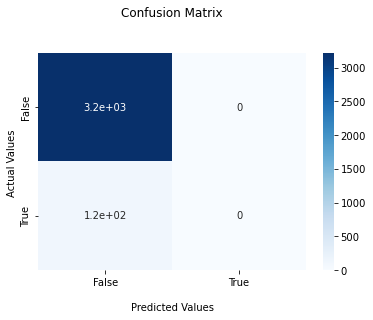

In [44]:
show_confusion_matrix(y_train, tree1.predict(X_train))

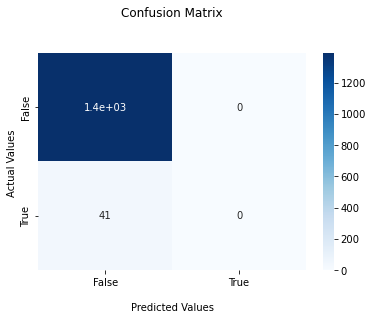

In [45]:
show_confusion_matrix(y_test, tree1.predict(X_test))

Udało się nieznacznie podbić wynik accuracy na zbiorze testowym, ale zapłaciliśmy za to cenę w postaci sporo niższego gini. Precision score jest równy zero. Sprawdziliśmy na macierzy konfucji, że jest to skutkiem tego, że każdej wartości przypisywany jest fałsz. Model w ogóle nie przewiduje prawdy. 

Sprawdzimy teraz, czy jeśli wybierzemy więcej parametrów i więcej wartości do wyboru to uzyskamy lepsze wyniki.

In [16]:
max_depth=[3, 4, 5, 6, 7, 8, 9, 10]
splitter = ["best", "random"]
criterion=["gini","entrophy"]
ccp_alpha=[0, 0.05, 0.1, 0.02]
min_samples_split=range(1,20)
min_samples_leaf=[0.5, 1, 1.5, 2]
max_features=["sqrt", "log2"]
param_grid = dict(max_depth=max_depth, splitter=splitter, criterion=criterion, min_samples_leaf=min_samples_leaf,
                  ccp_alpha=ccp_alpha, min_samples_split=min_samples_split, max_features=max_features)

In [17]:
tree = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree, param_grid=param_grid, cv = 5, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_} ")

Best score: 0.9682733188331856
Best parameters: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'splitter': 'random'} 


In [47]:
tree2 = DecisionTreeClassifier(ccp_alpha = 0,
                              criterion = 'gini',
                              max_depth = 7,
                              max_features ='sqrt',
                              min_samples_leaf = 2,
                              min_samples_split = 17,
                              splitter = 'random')
tree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=7, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=17,
                       splitter='random')

In [48]:
print_scores(tree2)

ZBIÓR TRENINGOWY:
Model score: 0.9640826099970069
Precision score: 0.6666666666666666
Gini score: 0.5160827871398815
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9720670391061452
Precision score: 1.0
Gini score: 0.5121951219512195


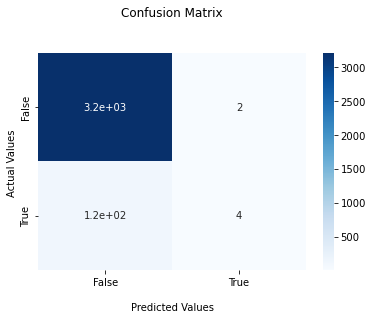

In [49]:
show_confusion_matrix(y_train, tree2.predict(X_train))

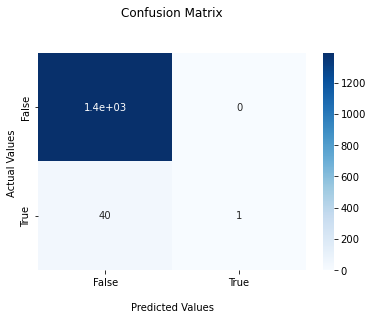

In [50]:
show_confusion_matrix(y_test, tree2.predict(X_test))

Widać, że w tym przypadku widać największą poprawę dla precision score. Także gini jest trochę lepsze niż przy pierwszym tuningu, jednak nie tak dobre jak dla modelu bazowego. Accuracy na zbiorze testowym także jest najlepsze ze wszystkich, jednak względem poprzedniego modelu jest to nieznaczna poprawa. 

Sprawdzimy jakie wyniki dla takiego wyboru parametrów da zastosowanie Random Search:

In [21]:
tree = DecisionTreeClassifier()
random = RandomizedSearchCV(estimator=tree, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state = 100)

random_result = random.fit(X_train, y_train)

print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_}")

Best score: 0.9664773591829793
Best parameters: {'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 0.5, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 'ccp_alpha': 0.05}


In [22]:
tree3 = DecisionTreeClassifier(ccp_alpha = 0.05,
                              criterion = 'gini',
                              max_depth = 5,
                              max_features ='log2',
                              min_samples_leaf = 0.5,
                              min_samples_split = 9,
                              splitter = 'best')
tree3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, max_depth=5, max_features='log2',
                       min_samples_leaf=0.5, min_samples_split=9)

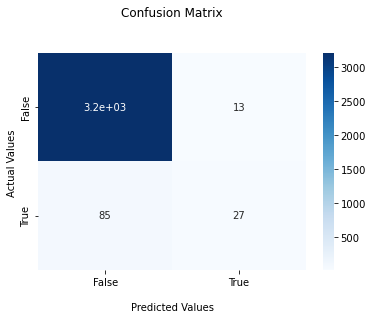

In [23]:
show_confusion_matrix(y_train, tree2.predict(X_train))

In [24]:
print_scores(tree3)

ZBIÓR TRENINGOWY:
Model score: 0.9664771026638731
Precision score: 0.0
Gini score: 0.5
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9678770949720671
Precision score: 0.0
Gini score: 0.5


W tym przypadku model nie jest przetrenowany, wuniki w zbiorze treniniowym i testowym są bardzo zbliżone. Wartość 0 w precision score bierze się z tego, że wartości *true positive* jest bardzo mało w porównaiu do *true negative*.

### Random Forest

In [25]:
forest_base = RandomForestClassifier()
forest_base.fit(X_train, y_train)
pred = forest_base.predict(X_test)

In [26]:
print_scores(forest_base)

ZBIÓR TRENINGOWY:
Model score: 0.9997006884166417
Precision score: 1.0
Gini score: 0.9955357142857143
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9706703910614525
Precision score: 0.75
Gini score: 0.5644958905828471


Podobnie jak w przypadku drzew decyzyjnych, acuuruacy score dla zbioru testowego jest bardzo wysoki, ale wydaje się, że model jest przetrenowany. Małe gini na zbiorze testowym to potwierdza.

Spróbujemy dobrać odpowiedznie hiperparametry:

In [27]:
max_depth=[3, 4, 5]
n_estimators = [80, 90, 100, 110, 120]
criterion=["gini","entrophy"]
min_samples_split = [2, 5, 10, 20, 50]
param_grid = dict(max_depth=max_depth, n_estimators = n_estimators, criterion=criterion, min_samples_split=min_samples_split)

In [28]:
forest = RandomForestClassifier()
grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv = 5, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_} ")

Best score: 0.9682724237623408
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 80} 


In [29]:
forest = RandomForestClassifier(min_samples_split = 10,
                             criterion = 'gini',
                             max_depth = 5,
                             n_estimators = 110)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=110)

In [30]:
print_scores(forest)

ZBIÓR TRENINGOWY:
Model score: 0.977252319664771
Precision score: 1.0
Gini score: 0.6607142857142857
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9713687150837989
Precision score: 0.8571428571428571
Gini score: 0.5648566409435974


Właściwie jedyne co się znacznie zmieniło to spadły wyniki dla zbioru testowego.

Sprawdźmy jakie hiperparametry wybierze random search:

In [31]:
forest = RandomForestClassifier()
random = RandomizedSearchCV(estimator=forest, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state = 100)

random_result = random.fit(X_train, y_train)

print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_}")

Best score: 0.9670757140427664
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 4, 'criterion': 'gini'}


In [32]:
forest2 = RandomForestClassifier(min_samples_split = 50,
                             criterion = 'gini',
                             max_depth = 4,
                             n_estimators = 80)
forest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=50, n_estimators=80)

In [33]:
print_scores(forest2)

ZBIÓR TRENINGOWY:
Model score: 0.9676743489973062
Precision score: 1.0
Gini score: 0.5178571428571429
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9692737430167597
Precision score: 1.0
Gini score: 0.5217391304347826


W tym przypadku jest nieco niższe accuracy, jednak precision score jest równy 1, gini się jednak zmniejszyło

### Support Vector Machine (SVM)

In [35]:
svm_base = SVC()
svm_base.fit(X_train, y_train)
pred = svm_base.predict(X_test)

In [36]:
print_scores(svm_base)

ZBIÓR TRENINGOWY:
Model score: 0.9664771026638731
Precision score: 0.0
Gini score: 0.5
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9678770949720671
Precision score: 0.0
Gini score: 0.5


Model daje dobre wyniki accuracy, nie jest przetrenowany, jednak precision score jest zerowy. Sprawdźmy to na macierzy konfuzji.

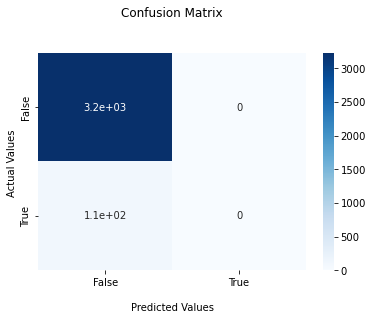

In [37]:
show_confusion_matrix(y_train, svm_base.predict(X_train))

Model ponownie nie przewiduje wartości *true*.

Spróbujmy teraz dobrać hiperparametry:

In [26]:
# Feature Scaling dla szybszego liczenia
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [29]:
C= [0.001, 0.01, 0.1,  1, 5]
kernel = ['linear', 'poly', 'sigmoid'] 
degree = [3,4,5]
gamma = ['scale', 'auto']
param_grid = dict(C=C, kernel=kernel, degree=degree, gamma=gamma)

In [30]:
svm_model = SVC()
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv = 5, n_jobs=-1)

grid_result = grid.fit(X_train_scaled, y_train)

print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_} ")

Best score: 0.9646818470681955
Best parameters: {'C': 0.01, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'} 


In [32]:
svm_1 = SVC(C = 0.01, 
            degree = 5, 
            gamma = 'scale',
            kernel = 'poly')
svm_1.fit(X_train, y_train)

SVC(C=0.01, degree=5, kernel='poly')

In [33]:
print_scores(svm_1)

ZBIÓR TRENINGOWY:
Model score: 0.9634839868302904
Precision score: 0.0
Gini score: 0.5
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9713687150837989
Precision score: 0.0
Gini score: 0.5


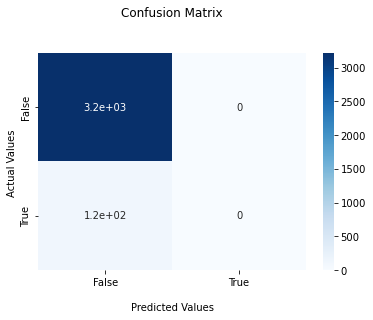

In [51]:
show_confusion_matrix(y_train, svm_1.predict(X_train))

Widać, że wynik na zbiorze testowym jest nieco niższy, jednak poskutkowało to niewielką poprawą na zbiorze testowym, co jest pożądaną zmianą. Jest to jednak niewielka zmiana. 

Sprawdźmy jakie wyniki da zastosowanie random search:

In [34]:
svm_model = SVC()
random = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state = 100)

random_result = random.fit(X_train_scaled, y_train)

print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_}")

Best score: 0.9637831959399585
Best parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'C': 0.1}


In [36]:
svm_2 = SVC(C = 0.1, 
            degree = 4, 
            gamma = 'scale',
            kernel = 'poly')
svm_2.fit(X_train, y_train)

SVC(C=0.1, degree=4, kernel='poly')

In [37]:
print_scores(svm_2)

ZBIÓR TRENINGOWY:
Model score: 0.9634839868302904
Precision score: 0.0
Gini score: 0.5
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.9713687150837989
Precision score: 0.0
Gini score: 0.5


Wynik jest w tym przypakdu identyczny z tym poprzedni, wybranym przez grid search, jednak różnią się one dwoma hiperparamterami. Dla pierwszego *degree = 5*, *C = 0.01*, a w tym przypadku to *degree = 4*, *C = 0.1*

# Podsumowanie

* dodanie większej ilości parametrów do testowania nie zawsze jest opłacalne - liczy się dłużej, a wyniki niekoniecznie muszą być dużo lepsze. Nasz zbiór danych nie jest szczególnie duży, dlatego różnice w czasie nie były duże, ale już zauważalne. W przypadku większego zbioru mogłoby to stanowić problem i wtedy warto się zastanowić czy zależy nam na nieznacznym podniesieniu predykcyjności
* ranodm search jest niemal tak samo dobry jak grid serach, w jednym przypadku dał dokładnie ten sam wynik, w innych zblizony, lub nawet bardziej optymalny
